# 📊 Risk Level Analysis & Visualization
This notebook visualizes enriched healthcare log data including calculated GDPR-related risk levels.

In [14]:
# 📥 Load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load enriched CSV (created in 02_Feature_engineering.ipynb)
df = pd.read_csv('../data/healthcare_logs.csv')
df['timestamp'] = pd.to_datetime(df['Timestamp'])
df['hour'] = df['timestamp'].dt.hour

In [15]:
# 🛡️ Ensure all features exist (recalculate if needed)
df['non_eu_flag'] = ~df['Country'].isin([
    'AT','BE','BG','CY','CZ','DE','DK','EE','ES','FI',
    'FR','GR','HR','HU','IE','IT','LT','LU','LV','MT',
    'NL','PL','PT','RO','SE','SI','SK'])
df['consent_violation_flag'] = df['ConsentStatus'] == False
df['admin_access_outside_hours'] = (df['Role'] == 'admin') & ((df['hour'] < 6) | (df['hour'] > 22))

In [16]:
# 🧮 Calculate risk score and risk level
df['risk_score'] = (
    df['non_eu_flag'].astype(int) +
    df['consent_violation_flag'].astype(int) +
    df['admin_access_outside_hours'].astype(int)
)
df['risk_level'] = df['risk_score'].apply(lambda x: 'High' if x >= 2 else ('Medium' if x == 1 else 'Low'))

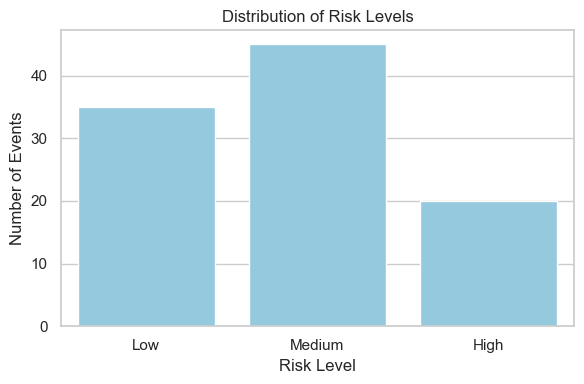

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📈 Risk Level Distribution (No hue = use color instead of palette)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='risk_level', order=['Low', 'Medium', 'High'], color='skyblue')
plt.title('Distribution of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()


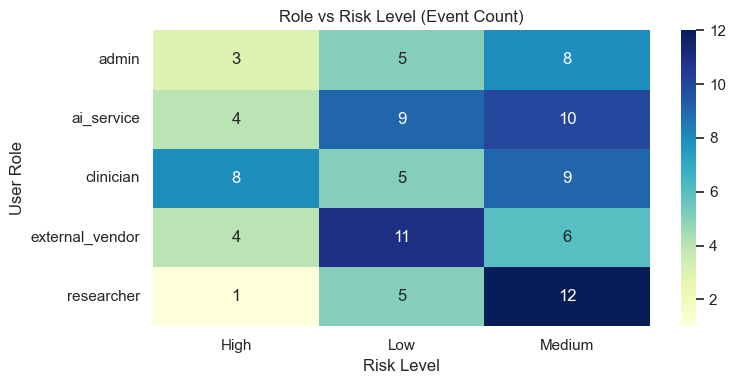

In [18]:
# 📊 Heatmap: Role vs Risk Level
pivot = df.pivot_table(index='Role', columns='risk_level', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 4))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Role vs Risk Level (Event Count)')
plt.xlabel('Risk Level')
plt.ylabel('User Role')
plt.tight_layout()
plt.show()